# Salary Predictions - Linear Regression

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns

In [7]:
# Import a csv into python
url = "https://wagon-public-datasets.s3.amazonaws.com/sprints/ml-salaries.csv"
salaries = pd.read_csv(url)

### Understanding the data

In [9]:
# Number of rows and columns
salaries.shape

(1802, 7)

In [11]:
# List the columns names
salaries.columns

Index(['Gender', 'Age', 'Department', 'Department_code', 'Years_exp',
       'Tenure (months)', 'Salary'],
      dtype='object')

In [13]:
# List the data type
salaries.dtypes

Gender               int64
Age                  int64
Department          object
Department_code      int64
Years_exp          float64
Tenure (months)      int64
Salary               int64
dtype: object

In [18]:
salaries.head(10)

,Gender,Age,Department,Department_code,Years_exp,Tenure (months),Salary
0,0,25,Tech,7,7.5,7,74922
1,1,26,Operations,3,8.0,6,44375
2,0,24,Operations,3,7.0,8,82263
3,0,26,Operations,3,8.0,6,44375
4,0,29,Engineering,0,9.5,25,235405
5,0,32,Other,4,11.0,8,87300
6,1,27,Operations,3,8.5,6,44375
7,0,24,Operations,3,7.0,6,44375
8,0,24,Other,4,7.0,8,96995
9,1,24,Operations,3,7.0,6,44375


In [19]:
#Readable summary of the data
round(salaries.describe())

,Gender,Age,Department_code,Years_exp,Tenure (months),Salary
count,1802.0,1802.0,1802.0,1802.0,1802.0,1802.0
mean,0.0,32.0,4.0,11.0,48.0,175827.0
std,0.0,5.0,2.0,3.0,36.0,105513.0
min,0.0,21.0,0.0,6.0,6.0,256.0
25%,0.0,28.0,2.0,9.0,23.0,104217.0
50%,0.0,31.0,4.0,10.0,39.0,150330.0
75%,1.0,35.0,7.0,12.0,66.0,221136.0
max,1.0,56.0,7.0,23.0,190.0,1024965.0


In [20]:
# To see only one column
df['Salary']

0        74922
1        44375
2        82263
3        44375
4       235405
         ...  
1797     88934
1798    133224
1799     72547
1800    227176
1801    114641
Name: Salary, Length: 1802, dtype: int64

In [14]:
# To see multiple columns
df[["Department", "Salary"]]

,Department,Salary
0,Tech,74922
1,Operations,44375
2,Operations,82263
3,Operations,44375
4,Engineering,235405
...,...,...
1797,Other,88934
1798,Engineering,133224
1799,Operations,72547
1800,Other,227176


### Visualization

<Axes: xlabel='Years_exp', ylabel='Salary'>

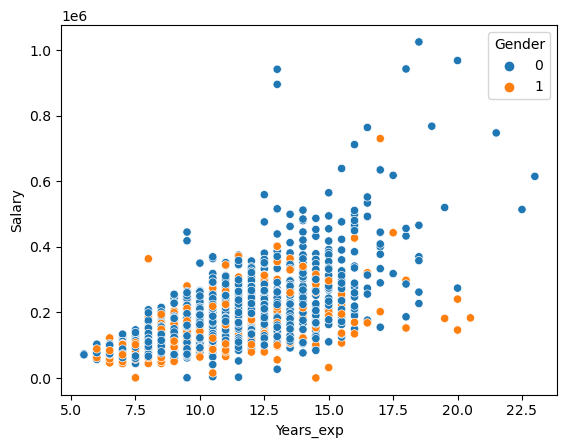

In [17]:
# To know if women and men earn equally in this example (Male is 0, and Female is 1)
sns.scatterplot(data=salaries, x='Years_exp', y='Salary', hue='Gender')

<Axes: xlabel='Gender', ylabel='count'>

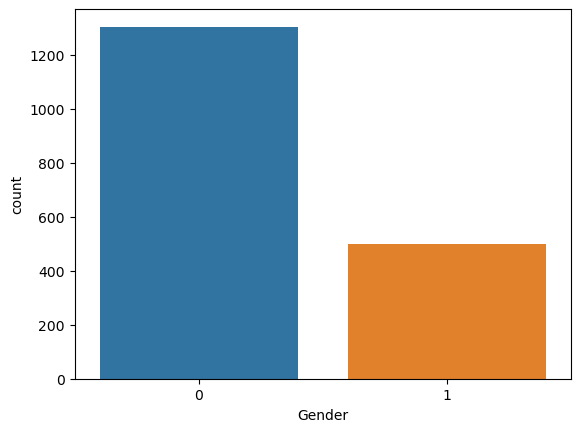

In [21]:
# To know how many of each category we have
sns.countplot(data=salaries, x='Gender')

<Axes: xlabel='Years_exp', ylabel='Salary'>

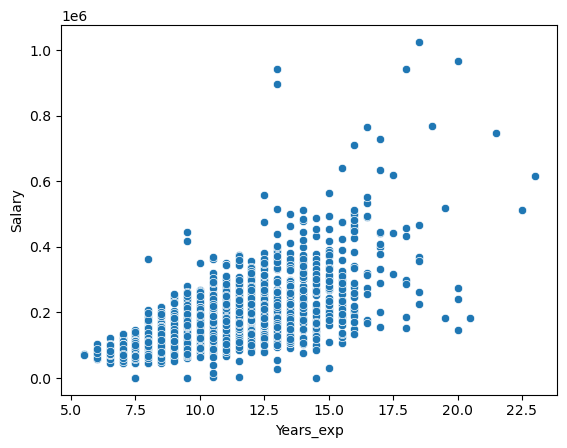

In [23]:
# To see if any two columns relate to each other
sns.scatterplot(data=salaries, x='Years_exp', y='Salary')

In [ ]:
# To know if some categories influence the output (use 'hue')
sns.scatterplot(data=salaries, x='Years_exp', y='Salary', hue='Gender')

## Linear Regression

#### Import and initialize the model

#### Select features and target 

In [25]:
# To see the columns
salaries.dtypes

Gender               int64
Age                  int64
Department          object
Department_code      int64
Years_exp          float64
Tenure (months)      int64
Salary               int64
dtype: object

In [26]:
# Separate target and features
target = salaries['Salary']
features = salaries.drop(['Salary', 'Department'], axis='columns')

,Gender,Age,Department_code,Years_exp,Tenure (months)
0,0,25,7,7.5,7
1,1,26,3,8.0,6
2,0,24,3,7.0,8
3,0,26,3,8.0,6
4,0,29,0,9.5,25
...,...,...,...,...,...
1797,0,29,4,9.5,34
1798,0,27,0,8.5,33
1799,0,29,3,9.5,15
1800,0,47,4,18.5,30


#### Import and initialize the model

In [29]:
# Import the model
from sklearn.linear_model import LinearRegression

In [30]:
# Initialize the model
model = LinearRegression()

#### Train the model

In [31]:
model.fit(features, target)

LinearRegression()

#### Score the model

In [32]:
model.score(features, target)

0.43754799942321343

In [ ]:
# This means that the data we have predict 44% of the change in salary

#### Predict

In [33]:
# Predict the salary of a new hire
features.columns

Index(['Gender', 'Age', 'Department_code', 'Years_exp', 'Tenure (months)'], dtype='object')

In [36]:
# Here's a freebie! change the numbers below to change the info of your hire (Male is 0, and Female is 1)
hire = [[0, 29, 7, 5.2, 10]]

model.predict(hire)

C:\Users\nevas\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([129676.16451097])

#### Explaining the model

In [37]:
# Check the coefficients of the model
model.coef_

array([-24245.70669339,   9467.18023663,   2351.48450104,   4733.59011832,
          249.19491939])

In [38]:
pd.concat([pd.DataFrame(features.columns),pd.DataFrame(np.transpose(model.coef_))], axis = 1)

,0,0
0,Gender,-24245.706693
1,Age,9467.180237
2,Department_code,2351.484501
3,Years_exp,4733.590118
4,Tenure (months),249.194919


In [ ]:
# This means that if gender is 1 (Female), the salary will go down by -24245.70)

In [39]:
# Intercept
model.intercept_

-188439.0716678151